Итоговая работа по курсу «Python для анализа данных»

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
sns.set_style('darkgrid')
from scipy.stats import pearsonr

1.Загрузить файл hr.csv.

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

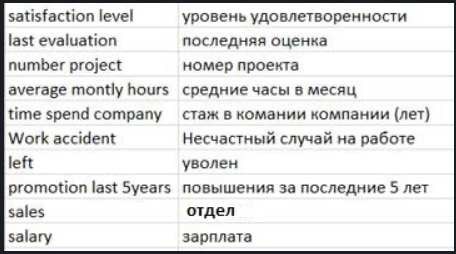

In [3]:
from IPython.display import Image
Image('index.png')

In [4]:
data=pd.read_csv('HR.csv',sep=",")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [61]:
len(data[data['Work_accident']==1])

2169

2.Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [5]:
import statistics

In [6]:
print('Среднее значение', statistics.mean(data['satisfaction_level']))
print('Медиана: ', statistics.median(data['satisfaction_level']))
print('Значение моды: ', statistics.mode(data['satisfaction_level']))
print('Минимум: ', min(data['satisfaction_level']))
print('Максимум: ', max(data['satisfaction_level']))
print('Среднеквадратичное отклонение: ', statistics.pstdev(data['satisfaction_level']))

Среднее значение 0.6128335222348157
Медиана:  0.64
Значение моды:  0.1
Минимум:  0.09
Максимум:  1.0
Среднеквадратичное отклонение:  0.2486223626820733


In [7]:
print('Среднее значение', statistics.mean(data['last_evaluation']))
print('Медиана: ', statistics.median(data['last_evaluation']))
print('Значение моды: ', statistics.mode(data['last_evaluation']))
print('Минимум: ', min(data['last_evaluation']))
print('Максимум: ', max(data['last_evaluation']))
print('Среднеквадратичное отклонение: ', statistics.pstdev(data['last_evaluation']))

Среднее значение 0.7161017401160077
Медиана:  0.72
Значение моды:  0.55
Минимум:  0.36
Максимум:  1.0
Среднеквадратичное отклонение:  0.1711634045107436


In [8]:
print('Среднее значение', statistics.mean(data['average_montly_hours']))
print('Медиана: ', statistics.median(data['average_montly_hours']))
#print('Значение моды: ', statistics.mode(data['average_montly_hours']))
print('Минимум: ', min(data['average_montly_hours']))
print('Максимум: ', max(data['average_montly_hours']))
print('Среднеквадратичное отклонение: ', statistics.pstdev(data['average_montly_hours']))

Среднее значение 201.0503366891126
Медиана:  200
Минимум:  96
Максимум:  310
Среднеквадратичное отклонение:  49.94143446256218


In [9]:
print('Среднее значение', statistics.mean(data['time_spend_company']))
print('Медиана: ', statistics.median(data['time_spend_company']))
print('Значение моды: ', statistics.mode(data['time_spend_company']))
print('Минимум: ', min(data['time_spend_company']))
print('Максимум: ', max(data['time_spend_company']))
print('Среднеквадратичное отклонение: ', statistics.pstdev(data['time_spend_company']))   

Среднее значение 3.498233215547703
Медиана:  3
Значение моды:  3
Минимум:  2
Максимум:  10
Среднеквадратичное отклонение:  1.4600875552715114


3.Рассчитать и визуализировать корреляционную матрицу для переменных.

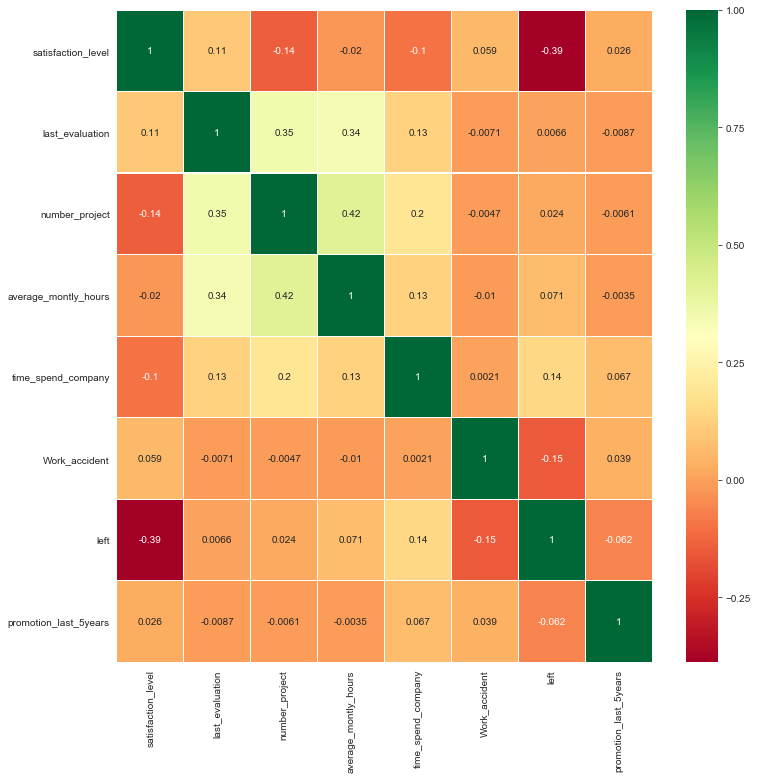

In [10]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

4.Визуализировать несколько взаимосвязей между переменными.

C:\Users\artem\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


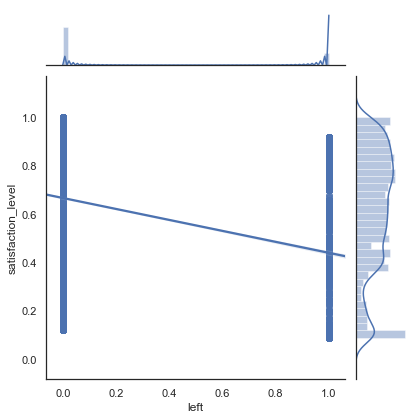

In [11]:
left = data['left']
satisfaction_level = data['satisfaction_level']
sns.set(style="white", color_codes=True)
g = sns.jointplot(x=left, y=satisfaction_level, data=data, kind='reg')
plt.show()

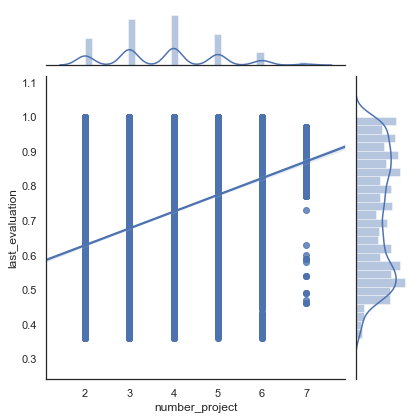

In [12]:
evaluation = data['last_evaluation']
project = data['number_project']
sns.set(style="white", color_codes=True)
g = sns.jointplot(x=project, y=evaluation, data=data, kind='reg')
plt.show()

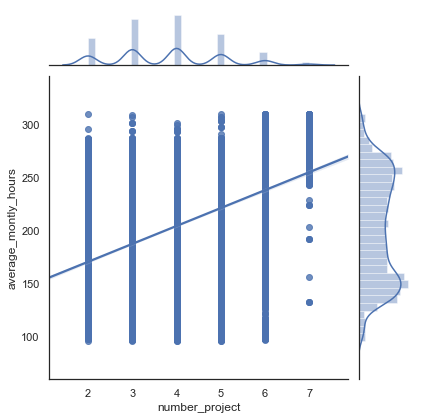

In [13]:
hours = data['average_montly_hours']
project = data['number_project']
sns.set(style="white", color_codes=True)
g = sns.jointplot(x=project, y=hours, data=data, kind='reg')
plt.show()

5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [29]:
import researchpy as rp

In [31]:
rp.summary_cont(data.groupby('left')['satisfaction_level'])

,N,Mean,SD,SE,95% Conf.,Interval
left,,,,,,
0,11428,0.666810,0.217104,0.002031,0.662829,0.670790
1,3571,0.440098,0.263933,0.004417,0.431440,0.448756


In [36]:
descriptives, results = rp.ttest(data['last_evaluation'], data['satisfaction_level'])

descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,last_evaluation,14999.0,0.716102,0.171169,0.001398,0.713362,0.718841
1,satisfaction_level,14999.0,0.612834,0.248631,0.002030,0.608854,0.616813
2,combined,29998.0,0.664468,0.219597,0.001268,0.661983,0.666953


In [37]:
results

,Independent t-test,results
0,Difference (last_evaluation - satisfaction_lev...,0.1033
1,Degrees of freedom =,29996.0000
2,t =,41.8987
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,0.4838
7,Hedge's g =,0.4838
8,Glass's delta =,0.6033
9,r =,0.2351


Последняя оценка и уровень удовлетворённости не имеют статистической разницы

In [41]:
descriptives, results = rp.ttest(data['time_spend_company'], data['promotion_last_5years'])

descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,time_spend_company,14999.0,3.498233,1.460136,0.011922,3.474864,3.521602
1,promotion_last_5years,14999.0,0.021268,0.144281,0.001178,0.018959,0.023577
2,combined,29998.0,1.759751,2.024548,0.011689,1.736839,1.782662


In [42]:
results

,Independent t-test,results
0,Difference (time_spend_company - promotion_las...,3.4770
1,Degrees of freedom =,29996.0000
2,t =,290.2205
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,3.3513
7,Hedge's g =,3.3512
8,Glass's delta =,2.3813
9,r =,0.8587


Повышение за последние пять лет и стаж в компании не имеют статистической разницы


6.Рассчитать сколько работников работает в каждом департаменте.

In [14]:
data['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

7.Показать распределение сотрудников по зарплатам.

In [22]:
salary_count = data['salary'].value_counts()#.tolist()
salary = ['low', 'medium', 'high']

<BarContainer object of 3 artists>

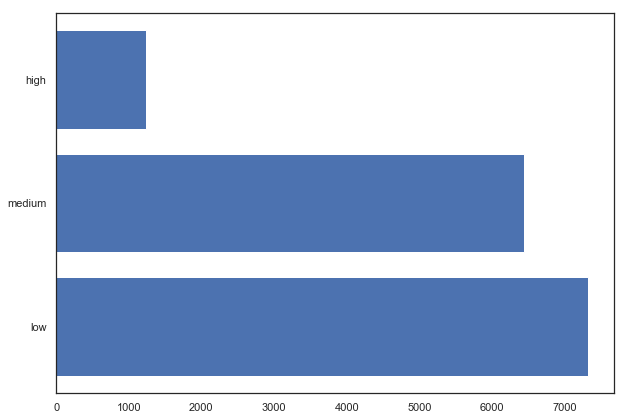

In [26]:
plt.barh(salary, salary_count)

8.Показать распределение сотрудников по зарплатам совместно с департаментами.

In [28]:
departments = data.groupby(['sales', 'salary']).count()[['satisfaction_level']]
departments.columns = ['staff']
departments.head(9)

staff
sales      salary       
IT         high       83
           low       609
           medium    535
RandD      high       51
           low       364
           medium    372
accounting high       74
           low       358
           medium    335

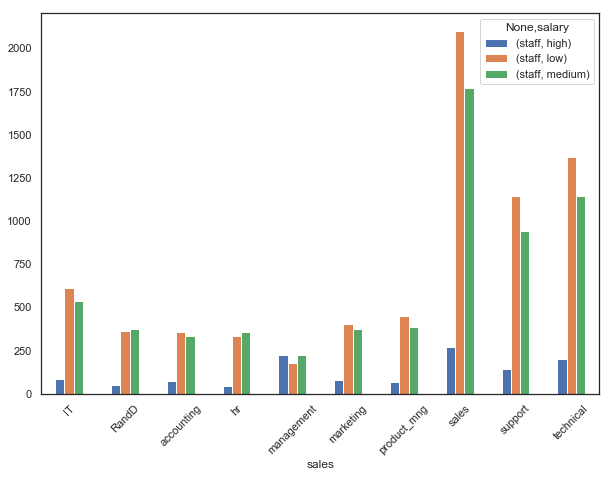

In [18]:
departments.unstack().plot(kind='bar', rot=45)

9.Сколько сотрудников покинули компанию.

In [19]:
len(data[data['left']==1])

3571

10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

Гипотеза 1 : у уволенных ниже уровень удовлетворённости, покидают компанию из-за недовольства

In [63]:
left = data[ data['left']==1 ]['satisfaction_level']
remain = data[ data['left']==0 ]['satisfaction_level']

In [64]:
descriptives, results = rp.ttest(left, remain)
print(descriptives)
print('_____________________________')
print(results)

             Variable        N      Mean        SD        SE  95% Conf.  \
0  satisfaction_level   3571.0  0.440098  0.263933  0.004417   0.431438   
1  satisfaction_level  11428.0  0.666810  0.217104  0.002031   0.662829   
2            combined  14999.0  0.612834  0.248631  0.002030   0.608854   

   Interval  
0  0.448758  
1  0.670790  
2  0.616813  
_____________________________
                                  Independent t-test     results
0  Difference (satisfaction_level - satisfaction_...     -0.2267
1                              Degrees of freedom =   14997.0000
2                                               t =     -51.6128
3                           Two side test p value =       0.0000
4                          Difference < 0 p value =       0.0000
5                          Difference > 0 p value =       1.0000
6                                       Cohen's d =      -0.9895
7                                       Hedge's g =      -0.9894
8                           

Средний уровень удовлетворённости ниже у уволенных, чем у работающих (0.44 против 0.67). Судя по p-значению, различие в выборках значительное. Возможно связано с тем, что уволенных в несколько раз меньше, чем тех, кто остался на работе

Гипотеза 2: уволены из-за более низких оценок

In [66]:
left_eval = data[ data['left']==1 ]['last_evaluation']
remain_eval = data[ data['left']==0 ]['last_evaluation']

In [67]:
descriptives, results = rp.ttest(left_eval, remain_eval)
print(descriptives)
print('_____________________________')
print(results)

          Variable        N      Mean        SD        SE  95% Conf.  Interval
0  last_evaluation   3571.0  0.718113  0.197673  0.003308   0.711627  0.724598
1  last_evaluation  11428.0  0.715473  0.162005  0.001515   0.712503  0.718444
2         combined  14999.0  0.716102  0.171169  0.001398   0.713362  0.718841
_____________________________
                                  Independent t-test     results
0  Difference (last_evaluation - last_evaluation) =       0.0026
1                              Degrees of freedom =   14997.0000
2                                               t =       0.8042
3                           Two side test p value =       0.4213
4                          Difference < 0 p value =       0.7894
5                          Difference > 0 p value =       0.2106
6                                       Cohen's d =       0.0154
7                                       Hedge's g =       0.0154
8                                   Glass's delta =       0.0134
9   

Средние оценки у обеих групп похожи, но заявить о статистическом различии/сходстве по t-тесту нельзя, р-значения больше доверительного интервала. Коэффициент корреляции Пирсона говорит о том, что оценки у уволенных и у текущих работников очень слабо коррелируют друг с друом. Скорее всего, увольняют работников не из-за оценок.

Гипотеза 3: уволенные дольше работали в компании, уволились из-за слишком долгого времени работы на одном месте

In [69]:
left_time = data[ data['left']==1 ]['time_spend_company']
remain_time = data[ data['left']==0 ]['time_spend_company']

In [70]:
descriptives, results = rp.ttest(left_time, remain_time)
print(descriptives)
print('_____________________________')
print(results)

             Variable        N      Mean        SD        SE  95% Conf.  \
0  time_spend_company   3571.0  3.876505  0.977698  0.016361   3.844427   
1  time_spend_company  11428.0  3.380032  1.562348  0.014615   3.351384   
2            combined  14999.0  3.498233  1.460136  0.011922   3.474864   

   Interval  
0  3.908583  
1  3.408679  
2  3.521602  
_____________________________
                                  Independent t-test     results
0  Difference (time_spend_company - time_spend_co...      0.4965
1                              Degrees of freedom =   14997.0000
2                                               t =      17.9242
3                           Two side test p value =       0.0000
4                          Difference < 0 p value =       1.0000
5                          Difference > 0 p value =       0.0000
6                                       Cohen's d =       0.3436
7                                       Hedge's g =       0.3436
8                           

Статистическое различие в выборках отсутствует, а средние времена работы почти совпадают, следовательно эта гипотеза отвергнута